<a href="https://colab.research.google.com/github/JavierC11/ClasificacionSemillas_RegresionLogistica/blob/main/REGRESION_LOGISTICA_MULTINOMIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importar Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Cargamos los datos
data = pd.read_csv('/content/Dry_Bean.csv')

In [5]:
data.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
#Hacemos un estudio rapido del Dataset para ver los datos y si tenemos valores nulos.
data.info()
data.isnull().sum()

#Como podemos ver los tipos datos no teneos incongruencias ni datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

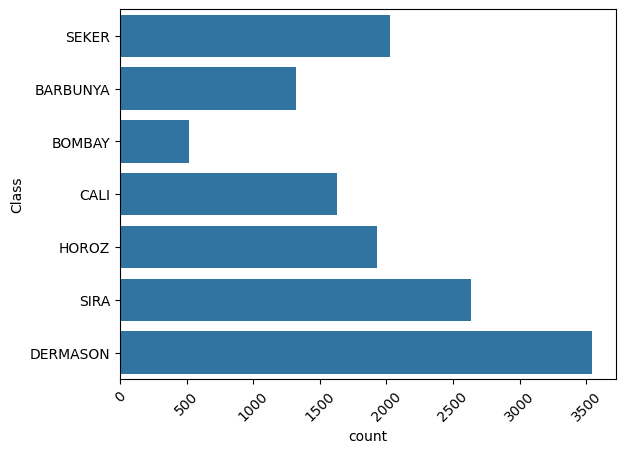

In [7]:
#Hacemos un conteo de las clases para saber con que datos estamos trabajando
data['Class'].value_counts()

sns.countplot(data['Class'])
plt.xticks(rotation=45)
plt.show()

In [8]:
#Ahora tenemos que estandarizar el dataset
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [9]:
#Seaparamos la variable a predecir y dataset
y = data['Class']
X = data.drop('Class',axis=1)

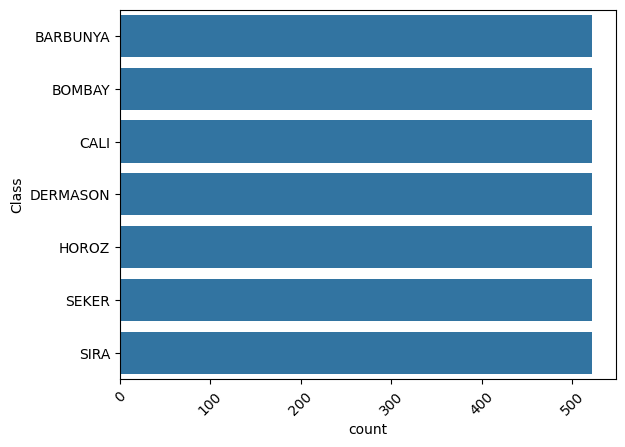

In [10]:
#Hacemos un conteo de las clases para saber con que datos estamos trabajando
X_over, y_over = undersample.fit_resample(X, y)


sns.countplot(y_over)
plt.xticks(rotation=45)
plt.show()

In [11]:
#Como podemos ver tenemos la misma forma en ambos dataset
print(X_over.shape)
print(y_over.shape)

(3654, 16)
(3654,)


In [12]:
list(y_over.unique())

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [13]:
X_over.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,70776,1060.894,386.619944,234.100208,1.651515,0.795842,71978,300.191276,0.775763,0.983300,0.790227,0.776451,0.005463,0.001225,0.602875,0.995658
1,66370,1004.139,339.287072,249.883085,1.357783,0.676443,67637,290.697280,0.720536,0.981268,0.827169,0.856789,0.005112,0.001699,0.734087,0.996731
2,60736,985.501,342.445302,226.741775,1.510288,0.749393,61680,278.085377,0.789353,0.984695,0.785854,0.812058,0.005638,0.001512,0.659438,0.995941
3,65219,1011.110,353.650546,235.308999,1.502920,0.746512,66672,288.165594,0.719436,0.978207,0.801654,0.814831,0.005423,0.001475,0.663950,0.997864
4,51332,889.637,330.822804,198.618899,1.665616,0.799716,52283,255.651975,0.751688,0.981811,0.815028,0.772776,0.006445,0.001418,0.597183,0.994678


In [14]:
#Reemplazamos los valores en texto por numero
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)

In [15]:
#Como podemos ver ya tenemos el dataset ordenado y con codigos no letras.
y_over.value_counts()

Class
1    522
2    522
3    522
4    522
5    522
6    522
7    522
Name: count, dtype: int64

In [16]:
data = pd.concat([X_over, y_over], axis=1)
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,70776,1060.894,386.619944,234.100208,1.651515,0.795842,71978,300.191276,0.775763,0.983300,0.790227,0.776451,0.005463,0.001225,0.602875,0.995658,1
1,66370,1004.139,339.287072,249.883085,1.357783,0.676443,67637,290.697280,0.720536,0.981268,0.827169,0.856789,0.005112,0.001699,0.734087,0.996731,1
2,60736,985.501,342.445302,226.741775,1.510288,0.749393,61680,278.085377,0.789353,0.984695,0.785854,0.812058,0.005638,0.001512,0.659438,0.995941,1
3,65219,1011.110,353.650546,235.308999,1.502920,0.746512,66672,288.165594,0.719436,0.978207,0.801654,0.814831,0.005423,0.001475,0.663950,0.997864,1
4,51332,889.637,330.822804,198.618899,1.665616,0.799716,52283,255.651975,0.751688,0.981811,0.815028,0.772776,0.006445,0.001418,0.597183,0.994678,1


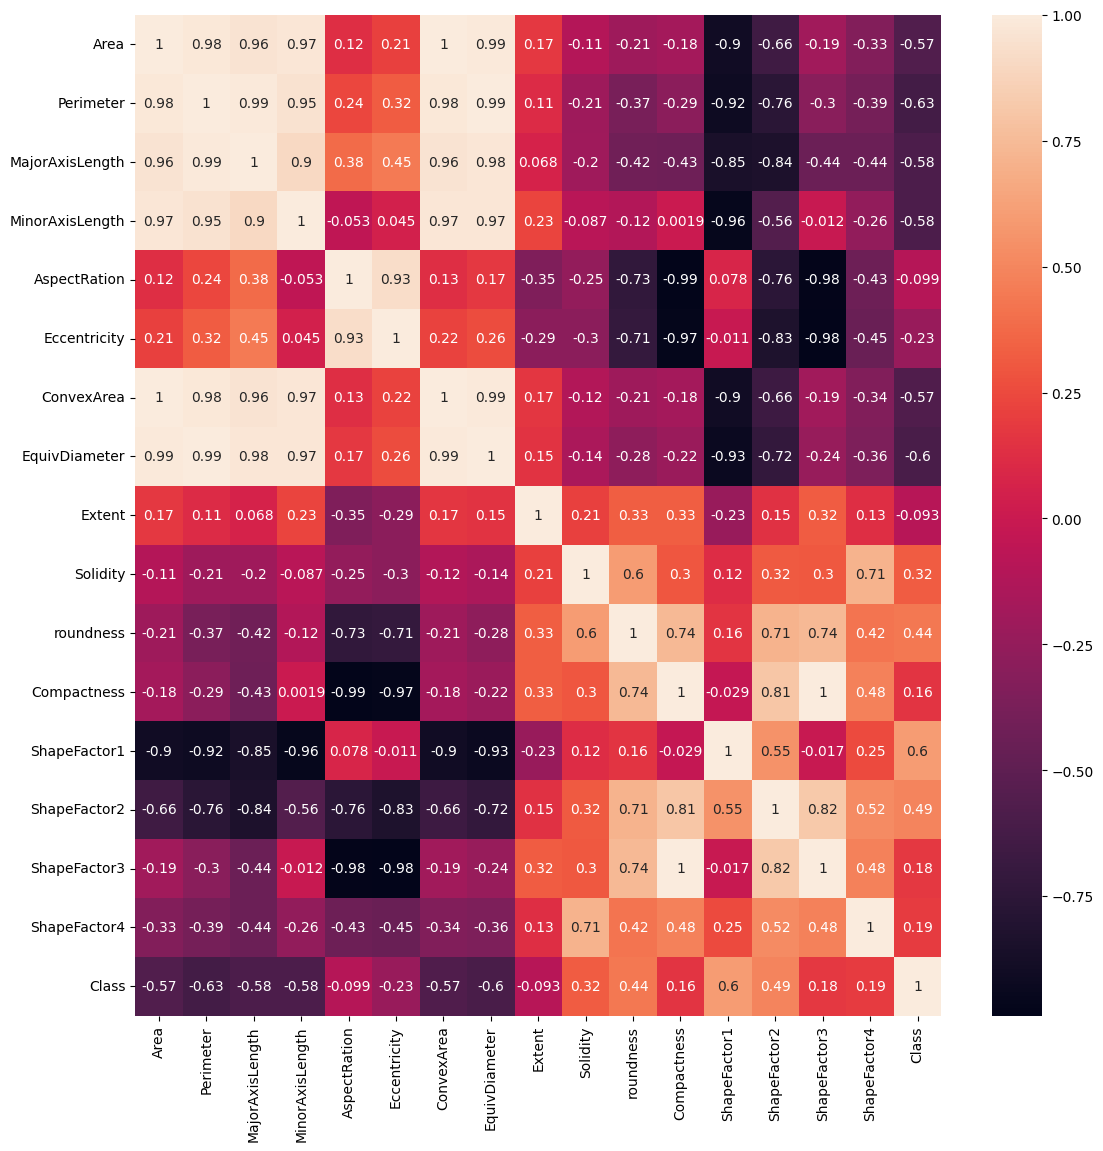

In [17]:
#Ahora revisamos las correlaciones de nuestros dataset
plt.figure(figsize=(13,13))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [18]:
#Como podemos observarhay algunas variables demaciado correalacionadas con aotras lo cual
#noc ocacionaria overfiting para el modelo por lo que lo borraremos

X_over = X_over.drop(['ConvexArea', 'Compactness','EquivDiameter'], axis=1)

In [19]:
#Ahora podemos realizar un estudio
#sns.pairplot(data)

In [20]:
#Ahora si pasaremos a la creacion del modelo por lo que primero partiremos nuestro datos.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= .2)

In [21]:
#Y ahora debemos escalar nuestros datos
from sklearn.preprocessing import StandardScaler
x_Scaler = StandardScaler()
X_train = x_Scaler.fit_transform(X_train)
X_test = x_Scaler.transform(X_test)

In [34]:
#Entrenamos el modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


model = LogisticRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Ahora vemos que tal funciono el modelo
Acurrancy = accuracy_score(y_test, y_predicted)
confusion_matrix = confusion_matrix(y_test, y_predicted)


#Como podmeos ver nuestro modelo tiene un uen desempeño pero aun asi intereremos optmizarlo lo mas posible
print(Acurrancy)
print(confusion_matrix)

0.93296853625171
[[121   0   5   0   1   0   1]
 [  0  98   0   0   0   0   0]
 [  6   0  96   0   0   1   0]
 [  0   0   0  90   0   5  10]
 [  0   0   3   0  91   0   2]
 [  0   0   0   1   0  87   3]
 [  0   0   0   7   1   3  99]]


In [59]:
#Aramamos nuestro funcion para probar varias clases y solvers
def Logistic_Regresion_def(Solver_, Clase_):

  model = LogisticRegression(random_state= 42, solver= Solver_, multi_class=Clase_)
  model.fit(X_train, y_train)

  y_predicted = model.predict(X_test)

  #Ahora vemos que tal funciono el modelo
  Acurrancy = accuracy_score(y_test, y_predicted)
  matrix = confusion_matrix(y_test, y_predicted)


  #Como podmeos ver nuestro modelo tiene un uen desempeño pero aun asi intereremos optmizarlo lo mas posible
  return Acurrancy

In [56]:
#Probamos la funcion
#clases[0] solvers[0]
print(Logistic_Regresion_def(solvers[0], clases[0]))

0.9343365253077975
None


In [60]:
#Asi que ahora trabajaremos buscando la mejor convinaion de solvers y clase
#Sabemos que existen
#multiclass como ovr y multinomial
#solvers como liblinear, newton-cg, lbfgs, sag, y saga
#Ahora crearemos una funcion donde podamos iterar entre la mejor convinacion de estas




#Lo primero seria armar nuestras listas de items
clases = ['ovr','multinomial']
solvers = ['liblinear','newton-cg','lbfgs','sag','saga']
results = []

#Ahora que las tenemos iteremos en todas ellas
for i in clases:
  for j in solvers:
    try:
      #print(Logistic_Regresion_def(j, i))
      results.append([i,j,Logistic_Regresion_def(j, i)])
    except:
      None

print(results)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[['ovr', 'liblinear', 0.9343365253077975], ['ovr', 'newton-cg', 0.9357045143638851], ['ovr', 'lbfgs', 0.9357045143638851], ['ovr', 'sag', 0.9357045143638851], ['ovr', 'saga', 0.9357045143638851], ['multinomial', 'newton-cg', 0.93296853625171], ['multinomial', 'lbfgs', 0.93296853625171], ['multinomial', 'sag', 0.93296853625171], ['multinomial', 'saga', 0.93296853625171]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


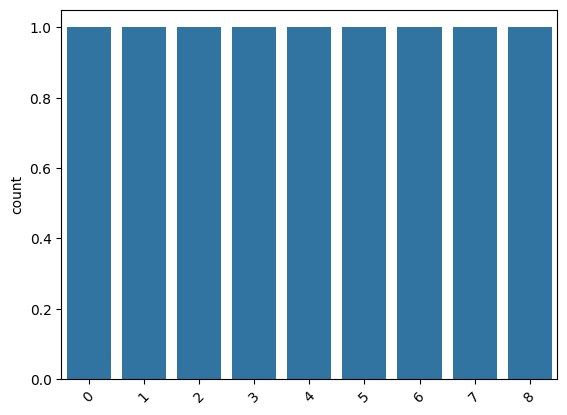

In [76]:
#Ahora revisamos nuestros scores

results = pd.DataFrame(results, columns=['Clase','Solver','Score'])


sns.countplot(data = results['Score'])
plt.xticks(rotation=45)
plt.show()

In [80]:
#Como podemos ver la mejor convinacion es ovr y newton por lo que ese seria el modelo
#a utilizar.
results.sort_values(by='Score',ascending=False)

,Clase,Solver,Score
1,ovr,newton-cg,0.935705
2,ovr,lbfgs,0.935705
3,ovr,sag,0.935705
4,ovr,saga,0.935705
0,ovr,liblinear,0.934337
5,multinomial,newton-cg,0.932969
6,multinomial,lbfgs,0.932969
7,multinomial,sag,0.932969
8,multinomial,saga,0.932969
